In [1]:
import dicom as dcm
import SimpleITK as sitk
import numpy as np 
import array
from numpy import unravel_index
import matplotlib.pyplot as plt
%matplotlib inline

from __future__ import print_function
from ipywidgets import interact


from plotly.offline import init_notebook_mode, plot, iplot
from plotly.graph_objs import *

init_notebook_mode(connected=True)

def ct_viewer(im):
    def plot_image(myslice):
        plt.imshow(im[myslice])#, cmap=plt.cm.gray
    interact(plot_image, myslice=(0, im.shape[0]))
    return;

In [33]:
heter='lung'
energy='6e'
name='12bone3'

im=sitk.ReadImage('/media/sf_CRCT/JupyterNotebook/data/image/curie/new_res2/'+energy+'/'+heter+'/'+name+'.mhd')
pix=sitk.GetArrayFromImage(im)

print('origin: ', im.GetOrigin())
print('spacing: ',im.GetSpacing())
print('size: ', im.GetSize())

ct_viewer(pix)

origin:  (-99.0, 50.25, -99.0)
spacing:  (2.0, 0.5, 2.0)
size:  (100, 200, 100)


interactive(children=(IntSlider(value=50, description=u'myslice'), Output()), _dom_classes=('widget-interact',))

139
(100, 100)


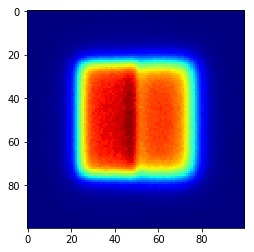

In [37]:
depth=30

depthim=int(((im.GetSize()[1]-1)-round(depth/im.GetSpacing()[1])))
print(depthim)

myslice=pix[:, depthim, :]
plt.imshow(myslice, cmap=plt.cm.jet)

y=myslice[im.GetSize()[0]/2,:]
print(myslice.shape)
#y=np.flipud(y)

x=np.arange(0,y.shape[0])
x=x*2.0
x=x-(x.max()/2)

trace=np.column_stack((x,y))

In [38]:
data= Scatter(x = x,
               y = y,
               name='cross',
               mode = 'lines+markers')
fig = dict(data=[data])
iplot(fig)

In [39]:
h=heter[0]
np.savetxt('/media/sf_CRCT/JupyterNotebook/data/gammaIndex/article/curie/'+energy+'/'+h+'/'+name+str(depth)+'.csv', trace, delimiter=',', header='pas,value', comments='')